In [7]:
#install Kaggle
!pip install -q kaggle

In [9]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#to list all the datasets in kaggle
!kaggle datasets list

In [ ]:
# Step 4: Download the dataset
!kaggle datasets download -d teertha/ushealthinsurancedataset

In [ ]:
# Step 5: Unzip the dataset
!unzip ushealthinsurancedataset.zip

In [15]:
# Step 6: Now you can load the data into pandas
import pandas as pd
df = pd.read_csv('insurance.csv')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('insurance.csv')

In [18]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer_0_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_2_4 = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer_2_4.fit(x[:, 2:4])
imputer_0_1.fit(x[:, 0:1])

x[:, 2:4] = imputer_2_4.transform(x[:, 2:4])
x[:, 0:1] = imputer_0_1.transform(x[:, 0:1])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,4] = le.fit_transform(x[:,4])

In [21]:
#Encoding the independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [23]:
#Feature Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Assuming columns -5 and -3 are numeric and need scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [-5, -3])  # indices of columns to scale
    ],
    remainder='passthrough'  # leave other columns unchanged
)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [25]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [28]:
from sklearn.preprocessing import StandardScaler

# Reshape y to 2D (required by StandardScaler)
y_train = y_train.reshape(-1, 1)  # Shape: (n_samples, 1)
y_test = y_test.reshape(-1, 1)

# Fit scaler ONLY on y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)  # Fit + transform
y_test_scaled = y_scaler.transform(y_test)        # Only transform (no fit!)

# Flatten back to 1D (optional, but SVR accepts 2D)
y_train_scaled = y_train_scaled.ravel()  # Shape: (n_samples,)
y_test_scaled = y_test_scaled.ravel()

In [30]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust hyperparameters
svr.fit(x_train, y_train_scaled)  # Train on scaled y

SVR()

In [32]:
y_pred_scaled = svr.predict(x_test)               # Get scaled predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Back to original scale

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)  # Compare with original y_test
print(f"MSE: {mse:.2f}")

MSE: 0.14


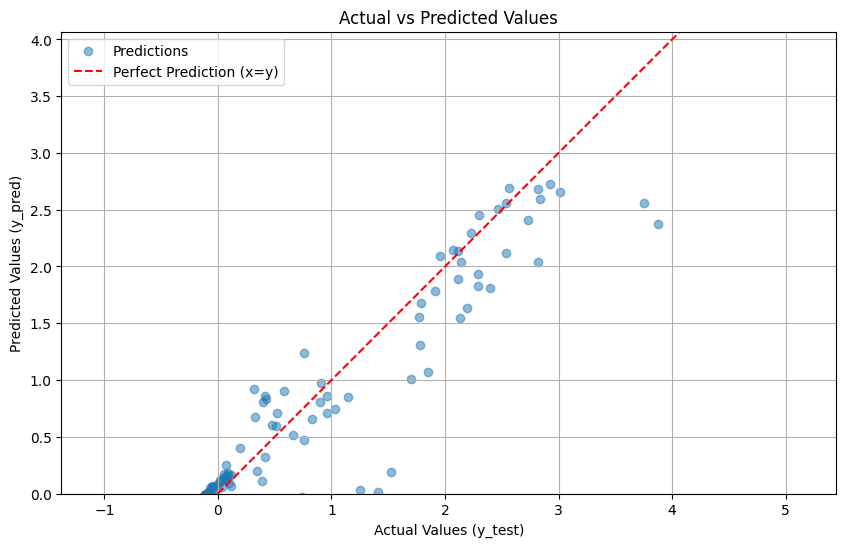

In [34]:
# Assuming y_pred and y_test are your arrays
plt.figure(figsize=(10, 6))

# Scatter plot of predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')

# Add the x=y line (perfect prediction line)
max_val = max(np.max(y_test), np.max(y_pred)) * 1.05
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction (x=y)')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Set equal aspect ratio
plt.axis('equal')
plt.xlim(0, max_val)
plt.ylim(0, max_val)

plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.14
R² Score: 0.86
